Imports

In [42]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [27]:
births = pd.read_csv("births.csv")

In [28]:
print("Dataset shape:", births.shape)
print("\nFirst few rows of the dataset:")
print(births.head())
print("\nUnique values in child_birth variable:")
print(births['child_birth'].unique())

Dataset shape: (49703, 7)

First few rows of the dataset:
   provmin     urban                                 child_birth     age_cat  \
0       68    strong             first line child birth, at home  25-29 year   
1       12  moderate          first line child birth, outpatient  25-29 year   
2       99       not          first line child birth, outpatient  25-29 year   
3       68  moderate      during pregnacy referred to specialist  30-34 year   
4       68    strong  originally at home, referred to specialist  30-34 year   

   age       etnicity  parity  
0   26          Dutch       2  
1   29          Dutch       1  
2   25  Mediterranean       2  
3   30          Dutch       3  
4   33          Dutch       1  

Unique values in child_birth variable:
['first line child birth, at home' 'first line child birth, outpatient'
 'during pregnacy referred to specialist'
 'originally at home, referred to specialist'
 'originally outpatient, referred to specialist'
 'referred to specia

# Question A

**Recode the variable child_birth into a new variable home where home=’at_home’ if the childbirth was a so-called first line child birth, at home, if not then home=’not_at_home’. Use for thisthe apply function with a lambda function or the map function with a dictionary, both are functions from the pandas library.**

In [29]:
births['home'] = births['child_birth'].apply(lambda x: 'at_home' if x == 'first line child birth, at home' else 'not_at_home')

print("\nVerification of the new 'home' variable:")
print(births[['child_birth', 'home']].head(10))
print("\nCounts of each category in 'home':")
print(births['home'].value_counts())


Verification of the new 'home' variable:
                                     child_birth         home
0                first line child birth, at home      at_home
1             first line child birth, outpatient  not_at_home
2             first line child birth, outpatient  not_at_home
3         during pregnacy referred to specialist  not_at_home
4     originally at home, referred to specialist  not_at_home
5                first line child birth, at home      at_home
6                first line child birth, at home      at_home
7  originally outpatient, referred to specialist  not_at_home
8     originally at home, referred to specialist  not_at_home
9                first line child birth, at home      at_home

Counts of each category in 'home':
home
not_at_home    29197
at_home        20506
Name: count, dtype: int64


# Question B

**Recode the variable parity in a new variable pari where pari has level primi if it concerns a first childbirth and multi if it is the second or more childbirth. You can do this again with apply or map function.**

In [30]:
births['pari'] = births['parity'].apply(lambda x: 'primi' if x == 1 else 'multi')

print("\nVerification of the new 'pari' variable:")
print(births[['parity', 'pari']].head(10))
print("\nCounts of each category in 'pari':")
print(births['pari'].value_counts())


Verification of the new 'pari' variable:
   parity   pari
0       2  multi
1       1  primi
2       2  multi
3       3  multi
4       1  primi
5       3  multi
6       4  multi
7       3  multi
8       1  primi
9       2  multi

Counts of each category in 'pari':
pari
multi    26326
primi    23377
Name: count, dtype: int64


# Question C

**Recode the variable etnicity into a new variable etni where etni has level Dutch if the woman was Dutch and Not Dutch if she was not Dutch. Hint: use unique() of the pandas library to see which levels are in the variable etnicity.**

In [31]:
births['etni'] = births['etnicity'].apply(lambda x: 'Dutch' if x == 'Dutch' else 'Not Dutch')

print("\nVerification of the new 'etni' variable:")
print(births[['etnicity', 'etni']].head(10))
print("\nCounts of each category in 'etni':")
print(births['etni'].value_counts())


Verification of the new 'etni' variable:
        etnicity       etni
0          Dutch      Dutch
1          Dutch      Dutch
2  Mediterranean  Not Dutch
3          Dutch      Dutch
4          Dutch      Dutch
5          Dutch      Dutch
6          Dutch      Dutch
7          Dutch      Dutch
8          Dutch      Dutch
9          Dutch      Dutch

Counts of each category in 'etni':
etni
Dutch        42513
Not Dutch     7190
Name: count, dtype: int64


# Question D

**Using the sklearn library make a logistic regression model with the function LogisticRegression for the probability of childbirth at home with the variables pari, age_cat (= age categorised), etni and urban (urbanisation degree). View the outcomes from the model with the classification_report() function.**

In [32]:
X = pd.get_dummies(births[['pari', 'age_cat', 'etni', 'urban']], drop_first=True)
y = (births['home'] == 'at_home').astype(int)  # Convert target to binary (1 for at_home, 0 for not_at_home)

Split the data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create and fit the logistic regression model

In [34]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predict on the test set

In [35]:
y_pred_logreg = logreg.predict(X_test)

Print the feature names and their coefficients

In [36]:
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Coefficients:
pari_primi: -1.0071
age_cat_30-34 year: 0.0823
age_cat_< 25 year: -0.1513
age_cat_> 35 year: -0.0067
etni_Not Dutch: -1.1569
urban_moderate: 0.0695
urban_not: -0.3470
urban_strong: 0.2754
urban_very strong: 0.2505


In [37]:
print("\nLogistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      8709
           1       0.59      0.55      0.57      6202

    accuracy                           0.65     14911
   macro avg       0.64      0.64      0.64     14911
weighted avg       0.65      0.65      0.65     14911



# Question E

**Using the same sklearn library make a decision tree for the probability of childbirth at home with the same variables as in the logistic regression model. View the decision tree with the function tree.plot_tree from package tree.**

In [38]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Predictions on the test set

In [39]:
y_pred_dt = dt.predict(X_test)

Evaluate the model

In [40]:
print("\nDecision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8709
           1       0.58      0.58      0.58      6202

    accuracy                           0.65     14911
   macro avg       0.64      0.64      0.64     14911
weighted avg       0.65      0.65      0.65     14911



Visualize the tree

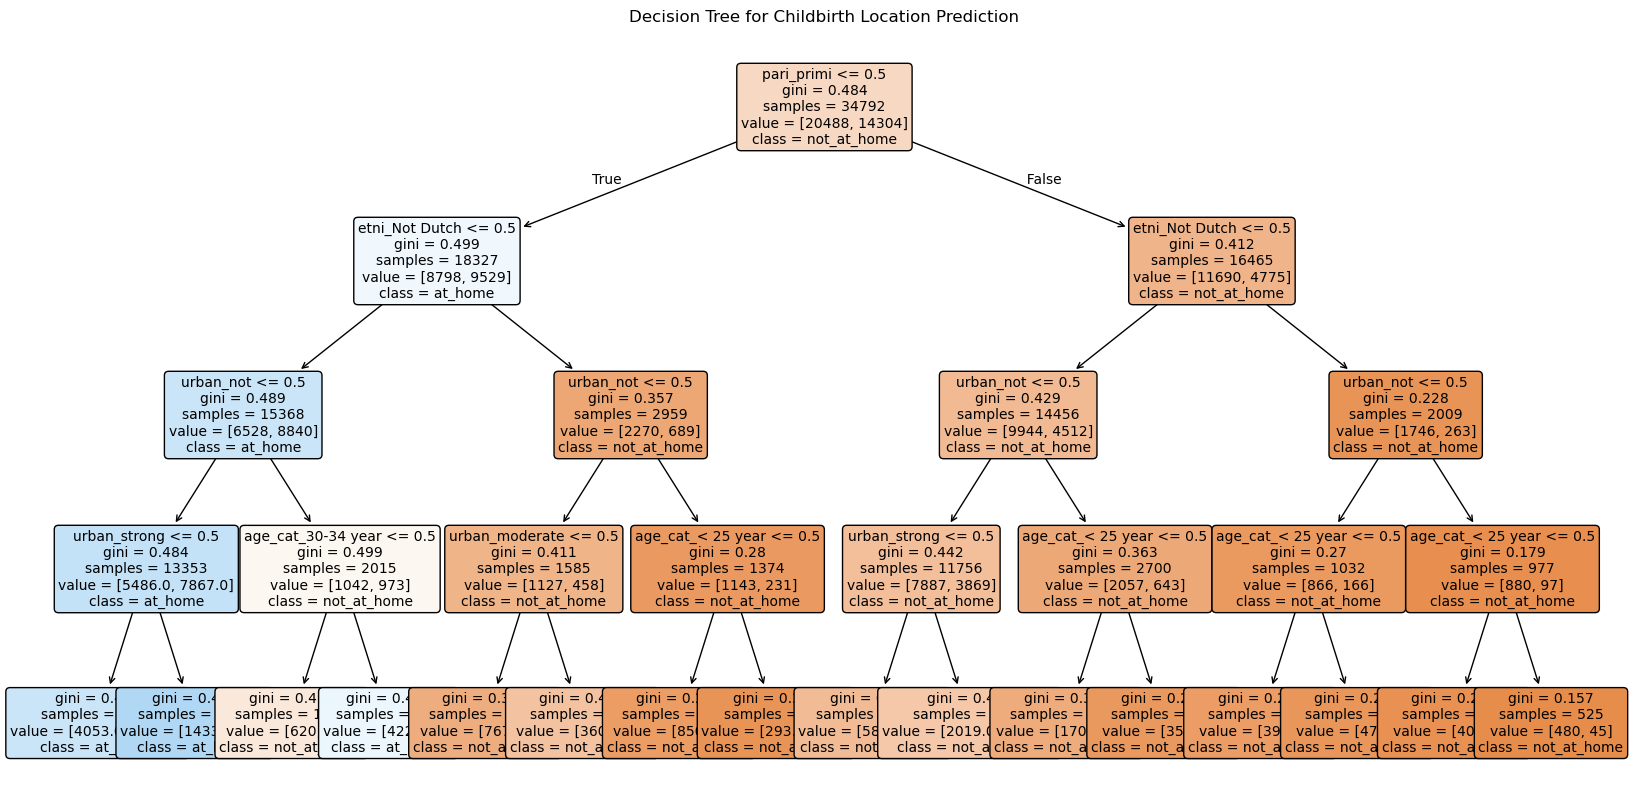

In [43]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['not_at_home', 'at_home'], 
               filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Childbirth Location Prediction")
plt.show()

# Question F

**For assessing which model, the logistic regression model or the decision tree, fits better the data we
should fit the models on a training set and calculate accuracy statistics on a test set (or use cross
validation). For this we use sklearn.model_selection and cross_val_score. Which model fits
the data better?**

I am going to use 5-fold cross-validation on both models

In [44]:
logreg_cv = LogisticRegression(max_iter=1000)
dt_cv = DecisionTreeClassifier(max_depth=4, random_state=42)

logreg_scores = cross_val_score(logreg_cv, X, y, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt_cv, X, y, cv=5, scoring='accuracy')

print("\nLogistic Regression - Cross Validation Scores:", logreg_scores)
print("Logistic Regression - Mean CV Score:", logreg_scores.mean())
print("Logistic Regression - Standard Deviation:", logreg_scores.std())

print("\nDecision Tree - Cross Validation Scores:", dt_scores)
print("Decision Tree - Mean CV Score:", dt_scores.mean())
print("Decision Tree - Standard Deviation:", dt_scores.std())


Logistic Regression - Cross Validation Scores: [0.65506488 0.65687557 0.65436073 0.65523139 0.6583501 ]
Logistic Regression - Mean CV Score: 0.6559765331755142
Logistic Regression - Standard Deviation: 0.001444939770561607

Decision Tree - Cross Validation Scores: [0.65506488 0.65687557 0.65436073 0.65523139 0.65754527]
Decision Tree - Mean CV Score: 0.6558155673807455
Decision Tree - Standard Deviation: 0.0011947236307565704


**The logistic regression model has a slightly higher mean cross-validation score. However, the Decision Tree has a lower standard deviation, meaning its performance is slightly more consistent. Overall I'd say they perform almost identically.**